# *Lab 1: Exploratory Data Analysis*
Automotive Sales Dataset


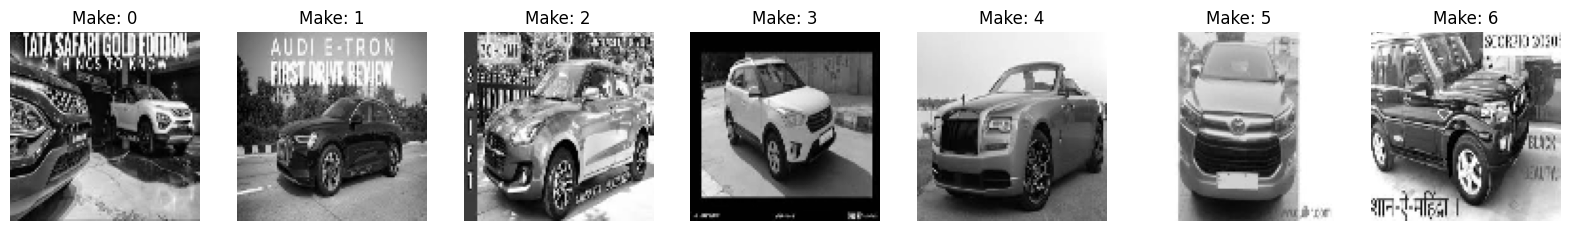

In [38]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


def read_images_from_folder(folder_path, grayscale=True):
    images = []
    labels = []
    image_shapes = {}
    for label, make in enumerate(os.listdir(folder_path)):
        make_path = os.path.join(folder_path, make)
        if os.path.isdir(make_path):
            for filename in os.listdir(make_path):
                img_path = os.path.join(make_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convert to grayscale if required
                    if grayscale:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    # Record image shape
                    shape = img.shape
                    if shape not in image_shapes:
                        image_shapes[shape] = 1
                    else:
                        image_shapes[shape] += 1
                    # Append image to list
                    images.append(img)
                    labels.append(label)

    # Find the majority shape
    majority_shape = max(image_shapes, key=image_shapes.get)

    # Filter out images with shapes different from the majority shape
    filtered_images = []
    filtered_labels = []
    for img, label in zip(images, labels):
        if img.shape == majority_shape:
            filtered_images.append(img)
            filtered_labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(filtered_images)
    labels = np.array(filtered_labels)
    return images, labels


def resize_images(images, target_size):
    resized_images = []
    for img in images:
        img = cv2.resize(img, target_size)
        resized_images.append(img)
    return np.array(resized_images)

def linearize_images(images):
    num_images = images.shape[0]
    flattened_size = np.prod(images.shape[1:])
    return images.reshape(num_images, flattened_size)

def visualize_images(images, labels, num_images=7):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))
    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)[0][0]  # Get the index of the first occurrence of the label
        axes[i].imshow(images[idx], cmap='gray')  # Show the image
        axes[i].set_title(f"Make {label}")  # Set the title with the make
        axes[i].axis('off')  # Turn off axis
    plt.show()

# Define paths to train and test folders
train_folder = "Cars Dataset/train"
test_folder = "Cars Dataset/test"

# Read images and labels from train and test folders
train_images, train_labels = read_images_from_folder(train_folder)
test_images, test_labels = read_images_from_folder(test_folder)

# Resize images to a common size
target_size = (100, 100)
train_images_resized = resize_images(train_images, target_size)
test_images_resized = resize_images(test_images, target_size)

# Linearize images
train_images_linearized = linearize_images(train_images_resized)
test_images_linearized = linearize_images(test_images_resized)

# Visualize several images
visualize_images(train_images_resized, train_labels)


In [31]:
from skimage.feature import daisy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def extract_daisy_features(images, step, radius, rings, histograms, orientations):
    features_list = []
    for img in images:
        features = daisy(img, step=step, radius=radius, rings=rings, histograms=histograms, orientations=orientations, visualize=False)
        features_list.append(features.ravel())
    return np.array(features_list)

# Extract DAISY features from train and test images
step = 2
radius = 4
rings = 2
histograms = 8
orientations = 8

train_features = extract_daisy_features(train_images_resized, step, radius, rings, histograms, orientations)
test_features = extract_daisy_features(test_images_resized, step, radius, rings, histograms, orientations)

# Train a classifier
classifier = SVC(kernel='linear')
classifier.fit(train_features, train_labels)

# Predict labels for test images
predictions = classifier.predict(test_features)

# Evaluate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Classification Accuracy:", accuracy)

KeyboardInterrupt: 